In [ ]:
!pip install matplotlib seaborn wordcloud PorterStemmer

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
import pickle


import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
# Get the info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.isnull()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,False,False,True,True,True
1,False,False,True,True,True
2,False,False,True,True,True
3,False,False,True,True,True
4,False,False,True,True,True
...,...,...,...,...,...
5567,False,False,True,True,True
5568,False,False,True,True,True
5569,False,False,True,True,True
5570,False,False,True,True,True


In [6]:
# Check null values if any
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
# View a Sample from the dataset
df.sample(10) 

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3889,spam,Double Mins & 1000 txts on Orange tariffs. Lat...,NaN,NaN,NaN
1441,ham,Ya:)going for restaurant..,NaN,NaN,NaN
1358,ham,If i start sending blackberry torch to nigeria...,NaN,NaN,NaN
5156,ham,"Sir, I need Velusamy sir's date of birth and c...",NaN,NaN,NaN
4057,ham,Hi di is yijue we're meeting at 7 pm at esapla...,NaN,NaN,NaN
1710,ham,"(No promises on when though, haven't even gott...",NaN,NaN,NaN
3614,ham,I enjoy watching and playing football and bask...,NaN,NaN,NaN
2009,ham,I can't keep going through this. It was never ...,NaN,NaN,NaN
3204,ham,"Oh, yes, I've just been a little under the wea...",NaN,NaN,NaN
4697,ham,Don no da:)whats you plan?,NaN,NaN,NaN


In [8]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [10]:
# Check the shape of the data
df.shape

(5572, 5)

# Steps:
1. Data Cleaning
2. EDA
3. Text Preprocessing - Tokenization, Stopwords, Stemming, vectorization
4. Model Building
5. Evaluation


- --

### 1. Data Cleaning

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [12]:
# Drop irrelevant columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [13]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [14]:
# Rename the existing columns ---> Give sensible names to columns
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.sample(5)

,target,text
633,ham,Got it. Seventeen pounds for seven hundred ml ...
382,ham,Hey leave it. not a big deal:-) take care.
4958,ham,"What i mean was i left too early to check, cos..."
2757,ham,Yo we are watching a movie on netflix
1208,ham,Also maaaan are you missing out


In [15]:
# Encoding ---> LabelEncoder ---> Labels ham=0 and spam=1
encoder = LabelEncoder()

df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# Missing Value Treatment ---> Remove missing values
df.isnull().sum() 

target    0
text      0
dtype: int64

In [17]:
# Check for Duplicates
df.duplicated().sum()

np.int64(403)

In [18]:
# Drop duplicates
df = df.drop_duplicates(keep='first')
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [19]:
df.shape

(5169, 2)

###  2. EDA - Exploratory Data Analysis
- EDA plays a very crucila role in project pipleline.
- Based on EDA we can decide which Techniques/Models we must use to get the perfect result.

In [20]:
# Check the count of spam and ham in the Target variable
df.target.value_counts()

target
0    4516
1     653
Name: count, dtype: int64

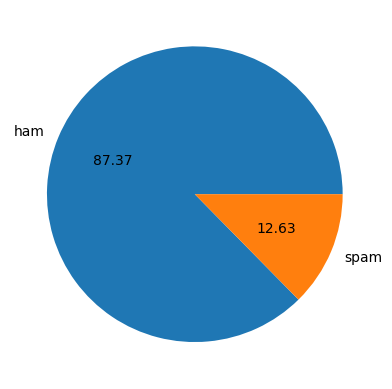

In [21]:
# Visualisation
plt.pie(df.target.value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

##### Insights :
- As we can se above the data is imbalanced, its more inclined towards ham which can futher lead to inaccuarcy. ie., model will be biased towards ham
- Due to majority of ham class the model will give wrong predictions. ie even if the text is spam it will predict it as ham, hence we should take coreective measures to remove class-imbalance, as this is not production ready code, so we can ignore it for now.


In [22]:
# nltk ---> Natural Language Toolkit library used for Text processing

# nltk.tokenize.punkt module ---> Punkt Sentence Tokenizer
# tokens ---> words
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\123\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [23]:
# Create a new column having number of characters present in each row of text column
df['number_of_characters'] = df['text'].apply(len)
df.head()

,target,text,number_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
# Create a new column having count of unique words present in each row for text column
df['number_of_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x))) # tokenize sentence in each row ---> calc no. unique words present in the sentence
df.head()

,target,text,number_of_characters,number_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
# POC of nltk.word_tokenize() ---> For a given sentence/row tokenize unqiue words only
for i in df['text']:
    print(f"Original length of sentence={len(i)} vs Length after tokenization={len(nltk.word_tokenize(i))}")


Original length of sentence=111 vs Length after tokenization=24
Original length of sentence=29 vs Length after tokenization=8
Original length of sentence=155 vs Length after tokenization=37
Original length of sentence=49 vs Length after tokenization=13
Original length of sentence=61 vs Length after tokenization=15
Original length of sentence=148 vs Length after tokenization=39
Original length of sentence=77 vs Length after tokenization=18
Original length of sentence=160 vs Length after tokenization=31
Original length of sentence=158 vs Length after tokenization=32
Original length of sentence=154 vs Length after tokenization=31
Original length of sentence=109 vs Length after tokenization=28
Original length of sentence=136 vs Length after tokenization=31
Original length of sentence=156 vs Length after tokenization=32
Original length of sentence=196 vs Length after tokenization=41
Original length of sentence=35 vs Length after tokenization=10
Original length of sentence=149 vs Length afte

In [26]:
# Create a new column having count of sentences present in the each row of text column
df['num_of_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,number_of_characters,number_of_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df.sample(10)

,target,text,number_of_characters,number_of_words,num_of_sentences
2262,0,It should take about &lt;#&gt; min,36,12,1
5462,1,Txt: CALL to No: 86888 & claim your reward of ...,147,31,2
3974,0,do u think that any girl will propose u today ...,132,21,1
3081,0,"And very importantly, all we discuss is betwee...",61,14,1
3388,0,O. Guess they both got screwd,29,7,2
4516,0,"Men always needs a beautiful, intelligent, car...",125,25,2
4677,0,It is a good thing I'm now getting the connect...,55,13,1
1634,1,"Eerie Nokia tones 4u, rply TONE TITLE to 8007 ...",161,29,1
2352,0,Thats cool. How was your day?,29,8,2
1335,0,"Sometimes we put walls around our hearts,not j...",162,37,2


In [28]:
df.columns

Index(['target', 'text', 'number_of_characters', 'number_of_words',
       'num_of_sentences'],
      dtype='object')

In [29]:
# Display meta data of specific columns
df[['number_of_characters', 'number_of_words', 'num_of_sentences']].describe()

,number_of_characters,number_of_words,num_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# Statistics of Ham messages only ---> target variable(ham--->0,spam--->1) 
df[df['target'] ==0][['number_of_characters', 'number_of_words', 'num_of_sentences']].describe()

,number_of_characters,number_of_words,num_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='number_of_characters', ylabel='Count'>

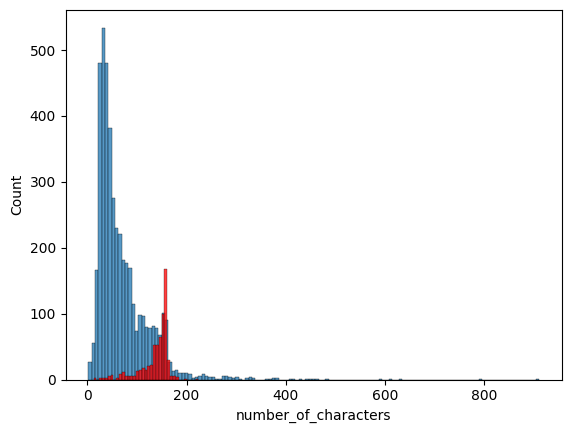

In [31]:
# Visualisation ---> histplot()

sns.histplot(df[df['target'] == 0]['number_of_characters'])
sns.histplot(df[df['target'] == 1]['number_of_characters'], color='red')

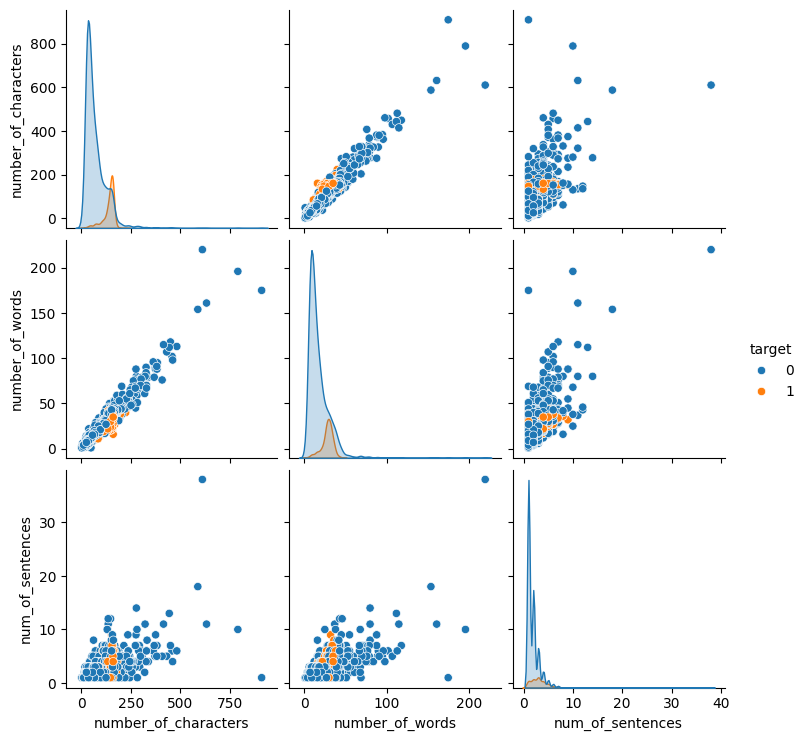

In [32]:
# pairplot() 
# ham--->0, spam--->1

sns.pairplot(df, hue='target')

<Axes: >

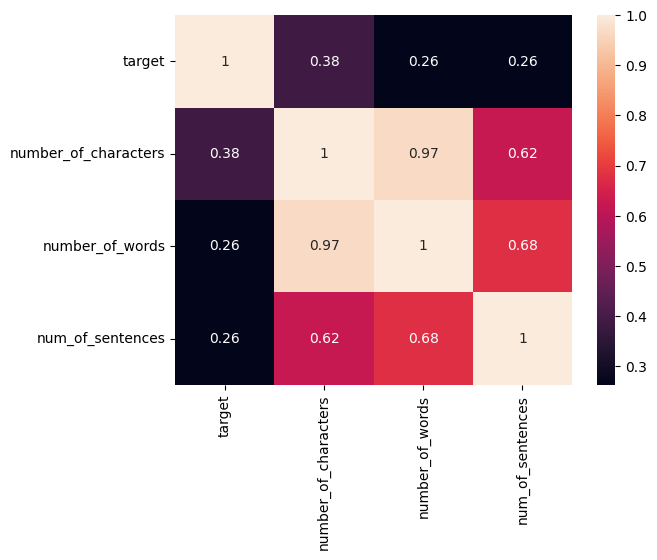

In [33]:
# heatmap() ---> correlation matrix ---> determines correlation between features ---> Correlation means for 1 unit change in X there will be a% change in Y

sns.heatmap(df[['target', 'number_of_characters', 'number_of_words', 'num_of_sentences']].corr(), annot=True)

### 3. Data Preprocessing
Text preprocessing steps:
- Lowercase
- Tokenize
- Remove special characters like , . ! $
- Stopward removal ---> Removal of words which don't have actual meaning
- Punctuation
- Stemming ---> Reducing a word to its root form

In [34]:
# Download stopwards

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\123\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [36]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
# Remove stopwards from the sentences we have as the meaning won't be lost even after deleting the stopwards
# Perform stemming
ps = PorterStemmer()

# transform_text() ---> takes to raw text and returns processed text
def transform_text(text):
    text = text.lower() # lowercasing
    text = nltk.word_tokenize(text) # tokenizing
    y = []

    # Check alpha-numeric values
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:] # all rows, all columns of y ---> Deep copying 
    y.clear()


    # Stopword removal and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:] 
    y.clear()

    # Stemming ---> PorterStemmer.stem()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)



In [38]:
# demo
transform_text("I'm gonna be home soon and i don't want to talk to anyone about it")

'gon na home soon want talk anyon'

In [39]:
# Create a new column and call tranform_text() on each row for text column
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,number_of_characters,number_of_words,num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [40]:
# Wordcloud for spam 

wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

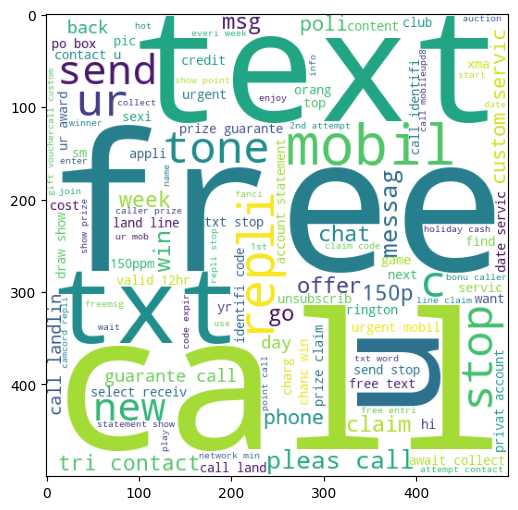

In [41]:
# Plot wordcloud ---> Higher the repetition of spam words, bolder/bigger will be that word

plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)

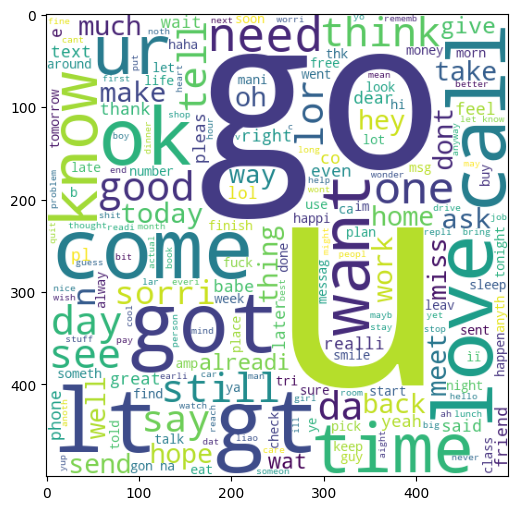

In [42]:
# Wordcloud for spam 

wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

# Plot wordcloud ---> Higher the repetition of ham words, bolder/bigger will be that word

plt.figure(figsize=(15, 6))
plt.imshow(ham_wc)

9939


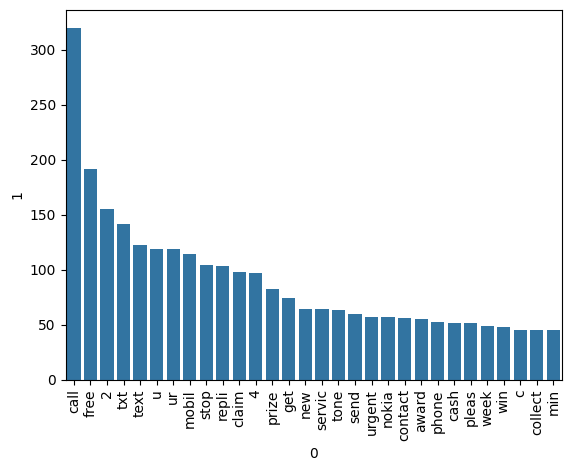

In [43]:
# Check number of words in spam class
spam_corpus = []

for msg in df[df['target'] == 1]['transformed_text'].to_list():
    for word in msg.split():
        spam_corpus.append(word)
# print(spam_corpus)
print(len(spam_corpus))

# plot the spam corpus
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

35404


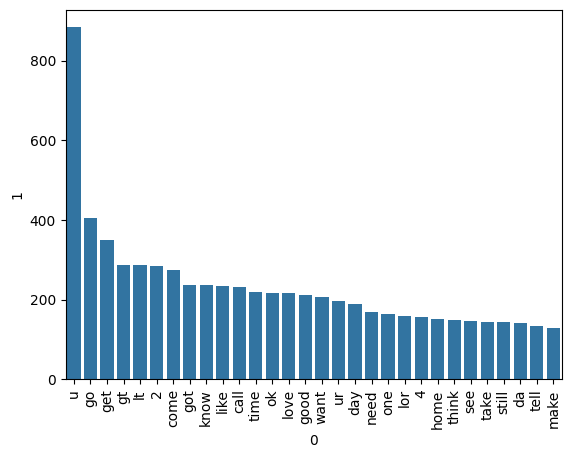

In [44]:
# Check number of words in ham class
ham_corpus = []

for msg in df[df['target'] == 0]['transformed_text'].to_list():
    for word in msg.split():
        ham_corpus.append(word)
# print(ham_corpus)
print(len(ham_corpus))

# plot the ham corpus
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [45]:
df.head()

,target,text,number_of_characters,number_of_words,num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### 4. Model Building

In [46]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)  # Used for encoding the data as model doesn't understand text, we need to represent it in number format. Thus we need to convert into vector.
# max_features=3000 ---> Converts each rows sentence to a vector of 3000 length/column. Thus shape will be 5169 rows * 3000 ---> X=(5169, 3000) ---> 1D-Vector-size=3000

X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 3000)

In [47]:
# POC 
X[0].shape

(3000,)

In [48]:
# Yactual/Target
y = df['target'].values

In [49]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [50]:
# Build model

gnb = GaussianNB()
mng = MultinomialNB()
bnb = BernoulliNB()

In [51]:
# fit, predict and evaluation score for GuassianNB

gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print(f"\nAccuracy : {accuracy_score(y_test, y_pred_gnb)}")
print(f"\nPrecision Score : {precision_score(y_test, y_pred_gnb)}")
print(f"\nConfusion Matrix :\n {confusion_matrix(y_test, y_pred_gnb)}")


Accuracy : 0.874274661508704

Precision Score : 0.5181818181818182

Confusion Matrix :
 [[790 106]
 [ 24 114]]


In [52]:
# fit, predict and evaluation score for MultinomialNB

mng.fit(X_train, y_train)
y_pred_mng = mng.predict(X_test)
print(f"\nAccuracy : {accuracy_score(y_test, y_pred_mng)}")
print(f"\nPrecision Score : {precision_score(y_test, y_pred_mng)}")
print(f"\nConfusion Matrix :\n {confusion_matrix(y_test, y_pred_mng)}")


Accuracy : 0.9709864603481625

Precision Score : 1.0

Confusion Matrix :
 [[896   0]
 [ 30 108]]


In [53]:
# fit, predict and evaluation score for BernoulliNB

bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
print(f"\nAccuracy : {accuracy_score(y_test, y_pred_bnb)}")
print(f"\nPrecision Score : {precision_score(y_test, y_pred_bnb)}")
print(f"\nConfusion Matrix :\n {confusion_matrix(y_test, y_pred_bnb)}")


Accuracy : 0.9835589941972921

Precision Score : 0.991869918699187

Confusion Matrix :
 [[895   1]
 [ 16 122]]


##### Insights :
- Due to class-imbalance the accuracy is high, so handle the class-imbalance and then check accuracy once again
- For now to avoid overfitting and handle class-imbalance to some extent we will select MultinomialNB to be on safer side

In [54]:
# Download the model and store it in local machine/server using pickle 
# Using pickle, we download the trained model and use it for predictions on diff inputs(ie.real test data), we don't need to train it again and again.

pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mng, open('model.pkl', 'wb'))

In [ ]:
### TEsting

In [57]:
tfidf.transform(['spam'])

<1x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [68]:
mng.predict(tfidf.transform(['2nd time tri 2 contact u pound prize 2 claim easi call 087187272008 now1 10p per minut']))[0]

np.int64(1)

In [67]:
df.transformed_text[5567]

'2nd time tri 2 contact u pound prize 2 claim easi call 087187272008 now1 10p per minut'

In [66]:
df.tail()

,target,text,number_of_characters,number_of_words,num_of_sentences,transformed_text
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...
5571,0,Rofl. Its true to its name,26,7,2,rofl true name
